In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [120]:
dataset = np.load('generated_dataset/dataset 3 atoms (1000 images).npy')
volume = np.load('generated_dataset/reconstructed map of dataset 3 atoms (1000 images).npy')

In [6]:
size_image = 25 #not necessary actually
N = 32 #size grid

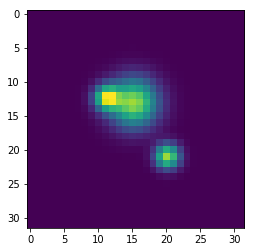

In [257]:
i=20
plt.imshow(dataset[i])

In [65]:
def Slice(vol, Rotation):
    """
    Take a slice out of volume
    """

    N = volume.shape[0]
    image = np.zeros((N,N), dtype=np.complex_)
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)
    z = np.linspace(-1,1,N)
    interpolating_function = RegularGridInterpolator((x,y,z), vol)

    for i in range(N):
        x = -1 + i*2/(N-1)
        for j in range(N):
            y = -1 + j*2/(N-1)
            
            vect = np.array((x,y,0))
            vect_ = Rotation.apply(vect)
            if np.max(np.abs(vect_))<=1:
                image[i,j] += interpolating_function(vect_)

    return image

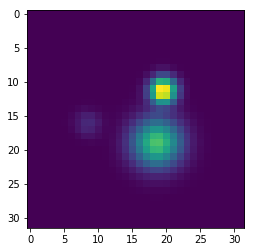

In [213]:
Rot = R.random()
plt.imshow(np.real(Slice(volume, Rot)))

It seems to work

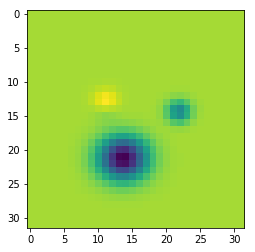

In [278]:
#Rot = R.random(random_state = 0)
Rot = R.from_euler('y', -180, degrees = True)

vol_ft = np.fft.fftn(volume)
vol_shift = np.fft.fftshift(vol_ft)
im_ft = Slice(vol_shift, Rot)
im = np.fft.ifftshift(im_ft)

plt.imshow(np.real(np.fft.ifft2(im)))

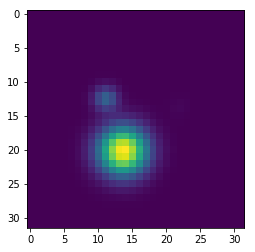

In [251]:
im_ = Slice(volume, Rot)

plt.imshow(np.real(im_))

Si j'essaie avec la slice à x=0

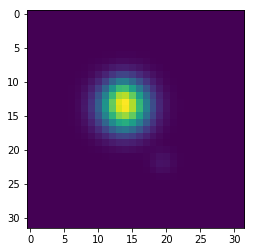

In [233]:
slice_ = (vol_shift[16, :, :] + vol_shift[17, :, :])/2
slice_ = np.fft.ifftshift(slice_)
im = np.fft.ifft2(slice_)
plt.imshow(np.real(im))

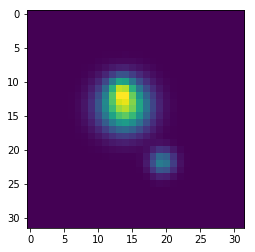

In [168]:
plt.imshow(np.sum(volume, axis = 0))

In [113]:
def backprojection1(images, orientations):
    """
    backprojection with conventional method (the orientations are assigned)
    """
    N = images[0].shape[0]
    dico = {}
    index_images = np.arange(len(images))
    index = np.arange(N)
    for n in index_images:
        rot = R.from_rotvec(-orientations[n]) #transpose
        for i in index:
            x = -1 + i*2/(N-1)
            for j in index:
                y = -1 + j*2/(N-1)
                vect = np.array((x,y,0))
                vect_ = rot.apply(vect)
                key = np.array2string(vect_, precision=3, separator=',', suppress_small=True)
                if key in dico.keys():
                    dico[key][0] += images[n][i,j]
                    dico[key][1] +=1
                else:
                    dico[key] = np.array((images[n,i,j], 1))
    points = np.zeros((len(dico), 3))
    values = np.zeros(len(dico))
    ctr = 0
    for keys in dico.keys():
        points[ctr] = eval('np.array(' + keys + ')')
        values[ctr] = dico[keys][0] / dico[keys][1]
        ctr+=1
    
    grid_x, grid_y, grid_z = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N),np.linspace(-1,1,N))

    volume = griddata(points, values, (grid_x, grid_y, grid_z))
    return volume

In [ ]:
def reconstruct(dataset, V_0, sigma_0=0, tau_0):
    return

In [105]:
#test
file_name = 'dataset 3 atoms (200 images)'
dataset = np.load('generated_dataset/' + file_name + '/' + file_name + '.npy')
volume_ = np.load('generated_dataset/' + file_name + '/reconstructed map of '+ file_name + '.npy')
orientations = np.load('generated_dataset/'+ file_name + '/orientations of '+ file_name +'.npy')

In [114]:
vol = backprojection1(dataset, orientations)

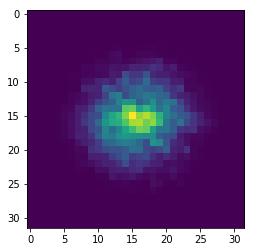

In [120]:
Rot = R.random()

im_ = Slice(vol, Rot)

plt.imshow(np.real(im_))